<a href="https://colab.research.google.com/github/lensariyacoub/CV_Code/blob/main/probl%C3%A8me_d'ordonnancement_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Génération des données

In [40]:
np.random.seed(42)  # Fixer la graine pour la reproductibilité
job_ids = [f'Job_{i+1}' for i in range(num_jobs)]
processing_times = np.random.randint(min_processing_time, max_processing_time + 1, size=num_jobs)
due_dates = np.random.randint(min_due_date, max_due_date + 1, size=num_jobs)

# Création du DataFrame

In [41]:
df_jobs = pd.DataFrame({
    'Job_ID': job_ids,
    'Processing_Time': processing_times,
    'Due_Date': due_dates
})

# Enregistrer la base de données sous format CSV

In [42]:
df_jobs.to_csv('single_machine_scheduling_dataset.csv', index=False)

# Affichage d'un échantillon du DataFrame

In [43]:

print(df_jobs)

     Job_ID  Processing_Time  Due_Date
0     Job_1                7        31
1     Job_2                4        53
2     Job_3                8        52
3     Job_4                5        67
4     Job_5                7        42
..      ...              ...       ...
95   Job_96               10        88
96   Job_97                9        89
97   Job_98                7        30
98   Job_99                9        35
99  Job_100                8        92

[100 rows x 3 columns]


# --------- Partie pour tracer les graphiques --------- #

# 1. Diagramme de Gantt pour un sous-ensemble des tâches (par exemple, 20 premières tâches)

In [30]:
def plot_gantt_chart(df, num_tasks=50):
    df_subset = df.head(num_tasks)
    fig, ax = plt.subplots(figsize=(10, 6))
# Ajouter les barres pour chaque tâche
    for index, row in df_subset.iterrows():
        ax.broken_barh([(index, row['Processing_Time'])], (index - 0.4, 0.8), facecolors=('tab:blue'))

    # Configuration des labels
    ax.set_yticks(range(len(df_subset)))
    ax.set_yticklabels(df_subset['Job_ID'])
    ax.set_xlabel('Temps')
    ax.set_title('Diagramme de Gantt pour les premières tâches')

    plt.show()

# 2. Histogramme des temps de traitement

In [31]:
def plot_processing_time_histogram(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Processing_Time'], bins=30, kde=True, color='blue')
    plt.title('Distribution des temps de traitement')
    plt.xlabel('Temps de traitement')
    plt.ylabel('Fréquence')
    plt.show()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Paramètres pour une grande base de données
num_jobs = 10000  # Nombre de tâches à générer
min_processing_time = 1  # Temps de traitement minimum
max_processing_time = 100  # Temps de traitement maximum
min_due_date = 50  # Date limite minimum
max_due_date = 1000  # Date limite maximum


# 3. Scatter plot : Temps de traitement vs Dates limites

In [32]:
def plot_scatter_processing_vs_due_dates(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Processing_Time', y='Due_Date', data=df, alpha=0.5)
    plt.title('Temps de traitement vs Date limite')
    plt.xlabel('Temps de traitement')
    plt.ylabel('Date limite')
    plt.show()

# Affichage des graphiques

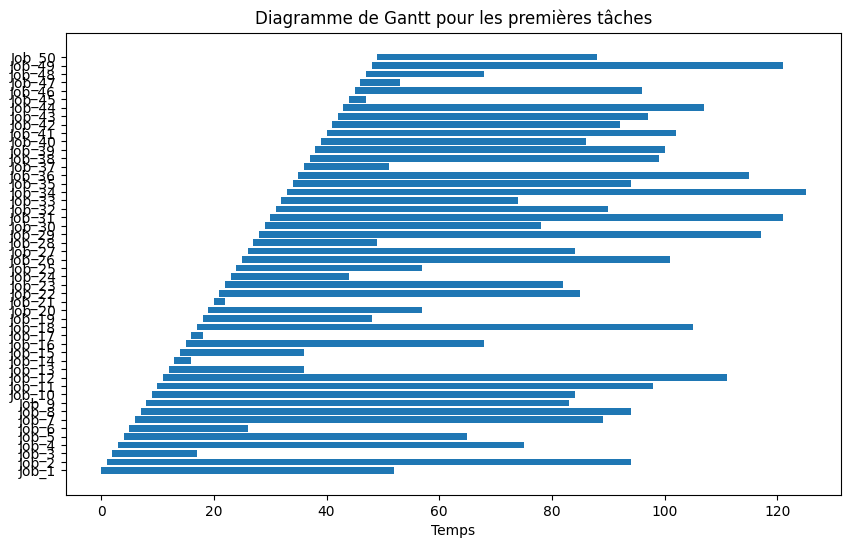

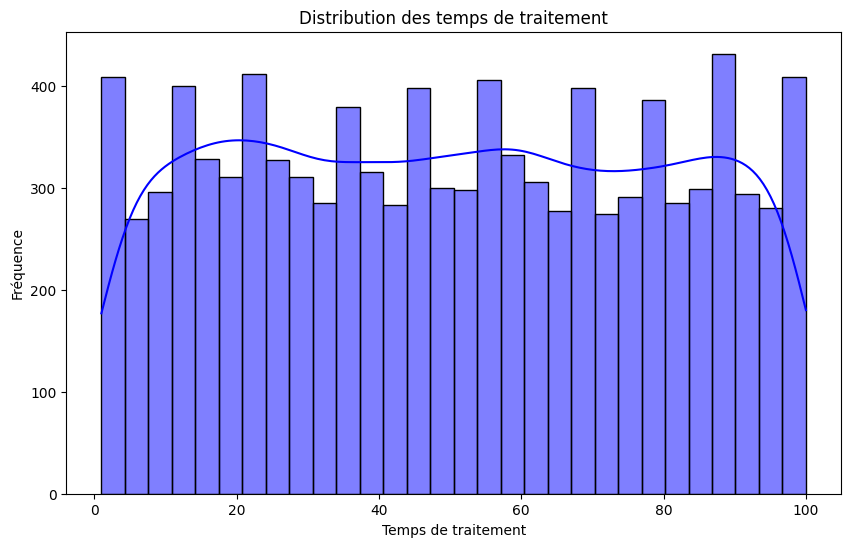

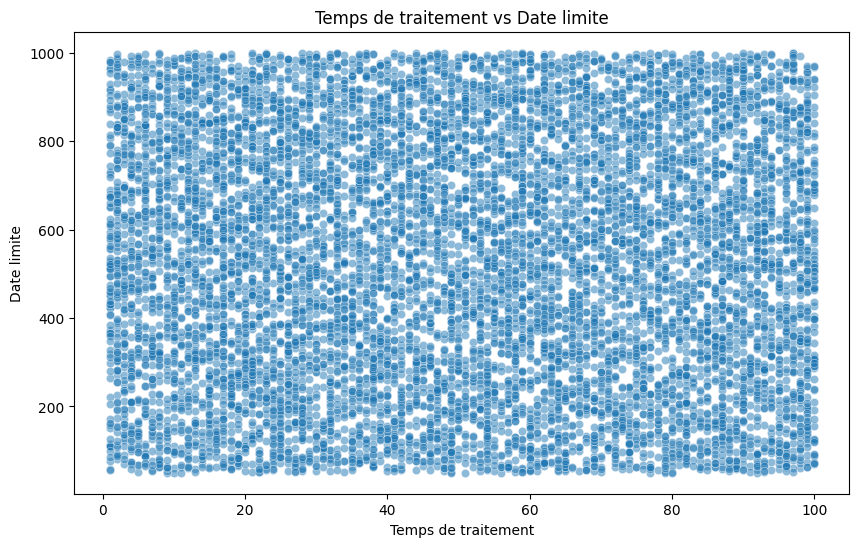

In [33]:

plot_gantt_chart(df_jobs)  # Diagramme de Gantt
plot_processing_time_histogram(df_jobs)  # Histogramme des temps de traitement
plot_scatter_processing_vs_due_dates(df_jobs)  # Scatter plot

Etapes résolution du probléme d'ordonnancement

In [34]:
import pandas as pd
import numpy as np

# Paramètres pour une grande base de données
num_jobs = 100  # Nombre de tâches à générer (réduit pour visualisation)
min_processing_time = 1  # Temps de traitement minimum
max_processing_time = 10  # Temps de traitement maximum
min_due_date = 20  # Date limite minimum
max_due_date = 100  # Date limite maximum

# Génération des données
np.random.seed(42)  # Fixer la graine pour la reproductibilité
job_ids = [f'Job_{i+1}' for i in range(num_jobs)]
processing_times = np.random.randint(min_processing_time, max_processing_time + 1, size=num_jobs)
due_dates = np.random.randint(min_due_date, max_due_date + 1, size=num_jobs)

# Création du DataFrame
df_jobs = pd.DataFrame({
    'Job_ID': job_ids,
    'Processing_Time': processing_times,
    'Due_Date': due_dates
})

# --------- Partie 1: Fonction d'évaluation --------- #


In [35]:

def evaluate_schedule(schedule):
    """
    Évalue un ordonnancement en calculant le retard total des tâches.
    """
    time = 0
    total_lateness = 0

    for index, row in schedule.iterrows():
        time += row['Processing_Time']
        lateness = max(0, time - row['Due_Date'])  # Retard s'il y en a
        total_lateness += lateness

    return total_lateness

# --------- Partie 2: Algorithme de résolution avec EDD --------- #

In [36]:
def edd_schedule(df):
    """
    Ordonnancement EDD (Earliest Due Date) : on trie les tâches par leur date limite.
    """
    return df.sort_values('Due_Date').reset_index(drop=True)

# --------- Partie 3: Optimisation et Résultat --------- #
# Ordonnancement en utilisant la règle EDD

In [37]:
optimal_schedule = edd_schedule(df_jobs)

# Évaluation de l'ordonnancement
total_lateness = evaluate_schedule(optimal_schedule)

# Affichage des résultats
print("Ordonnancement optimal (EDD):")
print(optimal_schedule[['Job_ID', 'Processing_Time', 'Due_Date']])
print(f"Retard total avec l'ordonnancement EDD : {total_lateness}")

Ordonnancement optimal (EDD):
    Job_ID  Processing_Time  Due_Date
0   Job_50                8        20
1   Job_81                7        20
2   Job_14                3        20
3   Job_83                8        21
4   Job_79                1        21
..     ...              ...       ...
95  Job_22                1        96
96  Job_12                8        97
97  Job_64               10        98
98  Job_19                6        98
99  Job_76               10       100

[100 rows x 3 columns]
Retard total avec l'ordonnancement EDD : 23188


# --------- Partie 4: Visualisation du diagramme de Gantt --------- #

In [38]:
import matplotlib.pyplot as plt

def plot_gantt_chart(schedule):
    """
    Crée un diagramme de Gantt pour un ordonnancement donné.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    start_time = 0

    for index, row in schedule.iterrows():
        ax.broken_barh([(start_time, row['Processing_Time'])], (index - 0.4, 0.8), facecolors=('tab:blue'))
        start_time += row['Processing_Time']
        # Configuration des labels
        ax.set_yticks(range(len(schedule)))
    ax.set_yticklabels(schedule['Job_ID'])
    ax.set_xlabel('Temps')
    ax.set_title('Diagramme de Gantt pour l\'ordonnancement EDD')


# Visualisation du diagramme de Gantt pour l'ordonnancement optimal



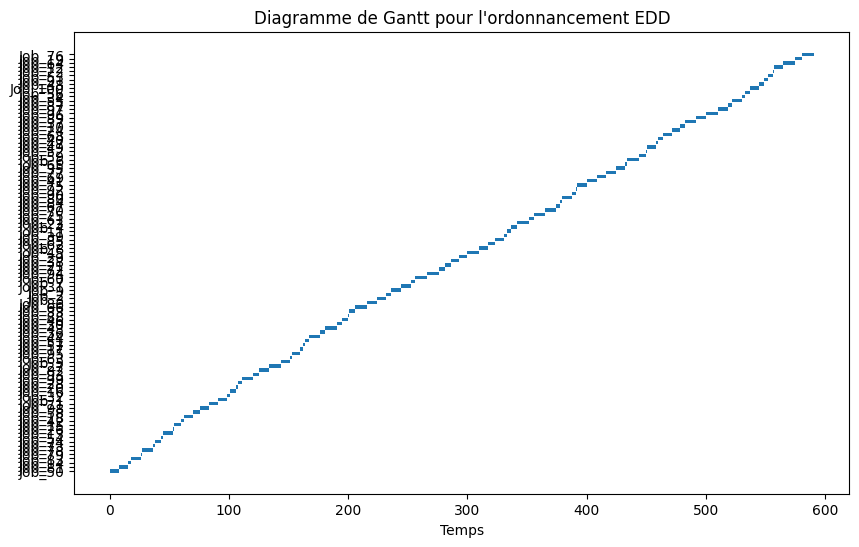

In [39]:

plot_gantt_chart(optimal_schedule)
plt.show()